<a href="https://colab.research.google.com/github/nisha1365/IIT-Summer-2023/blob/main/Week_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Week 3 SA

Hey Everyone!! 
We hope that you are excited to apply your newly acquired knowledge and test it on this notebook.
In this assignment, we will be walking through creating an email classifier based the content the mail has.

## About the data

The data "email.csv" has a few rows and about 3K columns including <b>Email_no.</b> and <b>spam</b>. <br>
Email_no. is like a unique id for an email and spam denotes whether the given mail is a spam or not (0 = not spam, 1 = spam)<br>
Rest of the columns are words in english with the values being equal to the frequency of that word in the email.
<br>Our goal is to predict whether the given mail is spam or not

## Importing useful libraries

In [60]:
import pandas as pd
import numpy as np

## Loading the data
### If you are using Datalore, you may use the csv file directly. Otherwise you may download it from <a href = "https://drive.google.com/file/d/1OxJ6SSuPypg-AfLbMRl0O9So9aDDNzbC/view?usp=sharing">this link</a>

In [61]:
df = pd.read_csv('emails.csv')

## Describe the data and generate some basic insights unsing methods like .info

In [62]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [63]:
df.Prediction.value_counts()

0    3672
1    1500
Name: Prediction, dtype: int64

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


In [65]:
df.describe()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
count,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,...,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000,5172.000000
mean,6.640565,6.188128,5.143852,3.075599,3.124710,2.627030,55.517401,2.466551,2.024362,10.600155,...,0.005027,0.012568,0.010634,0.098028,0.004254,0.006574,0.004060,0.914733,0.006961,0.290023
std,11.745009,9.534576,14.101142,6.045970,4.680522,6.229845,87.574172,4.314444,6.967878,19.281892,...,0.105788,0.199682,0.116693,0.569532,0.096252,0.138908,0.072145,2.780203,0.098086,0.453817
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,12.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,3.000000,1.000000,1.000000,2.000000,1.000000,28.000000,1.000000,0.000000,5.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,7.000000,4.000000,3.000000,4.000000,2.000000,62.250000,3.000000,1.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,210.000000,132.000000,344.000000,89.000000,47.000000,77.000000,1898.000000,70.000000,167.000000,223.000000,...,4.000000,7.000000,2.000000,12.000000,3.000000,4.000000,3.000000,114.000000,4.000000,1.000000


In [66]:
df.columns.value_counts()

Email No.     1
region        1
bryce         1
outages       1
adjust        1
             ..
god           1
green         1
care          1
withers       1
Prediction    1
Length: 3002, dtype: int64

## Looking at the data

In [67]:
# Plot histogram to visualize the top 5 common words in spam mail and non-spam mails seperately.





In [68]:

# Separate spam and non-spam emails
spam_emails = df[df['Prediction'] == 1]
non_spam_emails = df[df['Prediction'] == 0]

In [69]:
# Get word frequencies in spam emails
spam_word_counts = spam_emails.drop(['Email No.', 'Prediction'], axis=1).sum()
top_spam_words = spam_word_counts.nlargest(5)

In [70]:

# Get word frequencies in non-spam emails
non_spam_word_counts = non_spam_emails.drop(['Email No.', 'Prediction'], axis=1).sum()
top_non_spam_words = non_spam_word_counts.nlargest(5)

In [71]:
import matplotlib.pyplot as plt

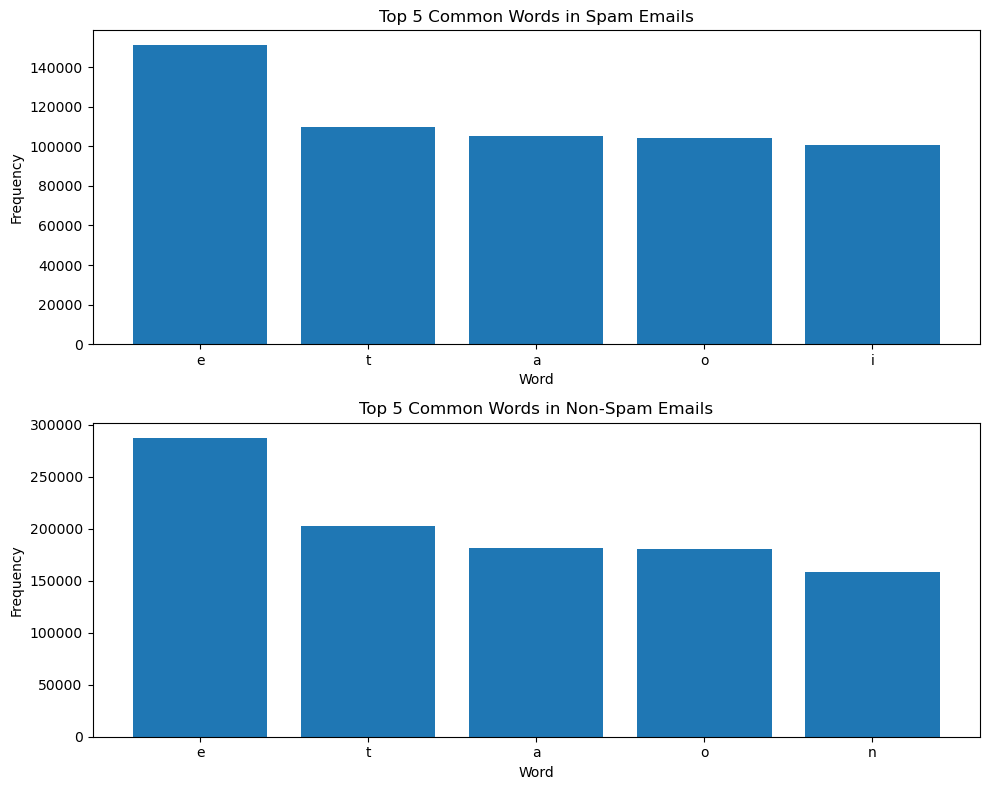

In [72]:
# Plot histograms
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)
plt.bar(top_spam_words.index, top_spam_words.values)
plt.title('Top 5 Common Words in Spam Emails')
plt.xlabel('Word')
plt.ylabel('Frequency')

plt.subplot(2, 1, 2)
plt.bar(top_non_spam_words.index, top_non_spam_words.values)
plt.title('Top 5 Common Words in Non-Spam Emails')
plt.xlabel('Word')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Figuring out some comparatively more important features

In [73]:
# There are 3K rows given in this dataset, can you think of some method to reduce the number of columns in the dataset? 
# Try taking only top 1.5K that will comprise of some of the most "deciding factors" 

In [74]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [75]:
# Separate the features (X) and target variable (y)
X = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']

In [76]:

# Perform feature selection using mutual information
selector = SelectKBest(score_func=mutual_info_classif, k=1500)
X_new = selector.fit_transform(X, y)

In [77]:

# Get the indices of the selected features
selected_indices = selector.get_support(indices=True)

# Get the column names of the selected features
selected_columns = X.columns[selected_indices]


In [78]:
# Create a new DataFrame with the selected features
df_new = df[['Email No.', 'Prediction']].join(pd.DataFrame(X_new, columns=selected_columns))

# Display the reduced dataset
print(df_new.head())

  Email No.  Prediction  ect  for  of    a  you  hou  in  this  ...  \
0   Email 1           0    1    0   0    2    0    0   0     0  ...   
1   Email 2           0   24    6   2  102    1   27  18     0  ...   
2   Email 3           0    1    0   0    8    0    0   4     0  ...   
3   Email 4           0   22    5   1   51    2   10   1     2  ...   
4   Email 5           0   17    5   2   57    0    9   3     2  ...   

   australia  prompt  ifhsc  valued  lay  infrastructure  military  allowing  \
0          0       0      0       0    0               0         0         0   
1          0       0      0       0    0               0         0         0   
2          0       0      0       0    0               0         0         0   
3          0       0      0       0    0               0         0         0   
4          0       0      0       0    0               0         0         0   

   ff  dry  
0   0    0  
1   1    0  
2   0    0  
3   0    0  
4   1    0  

[5 rows x 150

In [79]:
df_new.head()

,Email No.,Prediction,ect,for,of,a,you,hou,in,this,...,australia,prompt,ifhsc,valued,lay,infrastructure,military,allowing,ff,dry
0,Email 1,0,1,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,0,24,6,2,102,1,27,18,0,...,0,0,0,0,0,0,0,0,1,0
2,Email 3,0,1,0,0,8,0,0,4,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,22,5,1,51,2,10,1,2,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,0,17,5,2,57,0,9,3,2,...,0,0,0,0,0,0,0,0,1,0


## Train - Test Split

In [80]:
# Create trianing and testing data

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
# Separate the features (X) and target variable (y)
X = df.drop(['Email No.', 'Prediction'], axis=1)
y = df['Prediction']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (4137, 3000)
Testing data shape: (1035, 3000)
Training labels shape: (4137,)
Testing labels shape: (1035,)


## Making Predictions using Multinomial NB Classifier

In [83]:
# Feed the train data into multinomial naive bias classifier

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [85]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [86]:
# Create and train the Multinomial Naive Bayes classifier
classifier = MultinomialNB()
classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9545893719806763


In [87]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [88]:
# Check the model's accuracy of test data and plot the ROC-AUC curve

ROC-AUC Score: 0.9793548623047947


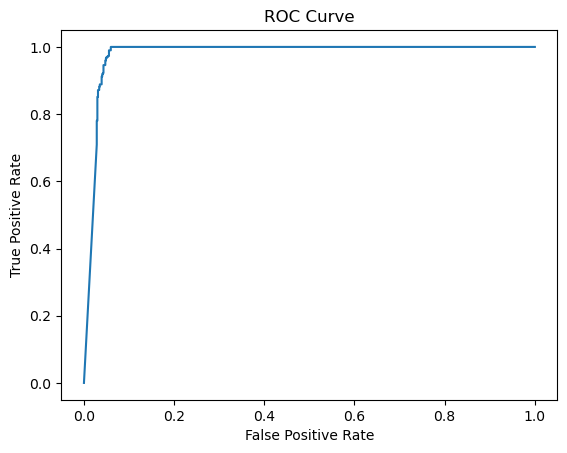

In [89]:
#Calculate the predicted probabilities for the positive class
y_pred_prob = classifier.predict_proba(X_test)[:, 1]

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print("ROC-AUC Score:", roc_auc)

# Calculate the false positive rate, true positive rate, and thresholds for the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

## Plot the confusion Matrix

In [90]:
# Print Confusion Matrix using any 5 words of your choice with the column 'spam'

In [91]:
from sklearn.metrics import confusion_matrix
import seaborn as sns


C:\Users\HP\AppData\Local\Temp\ipykernel_11576\1067387614.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data["Prediction"] = selected_data["Prediction"].map(label_mapping)


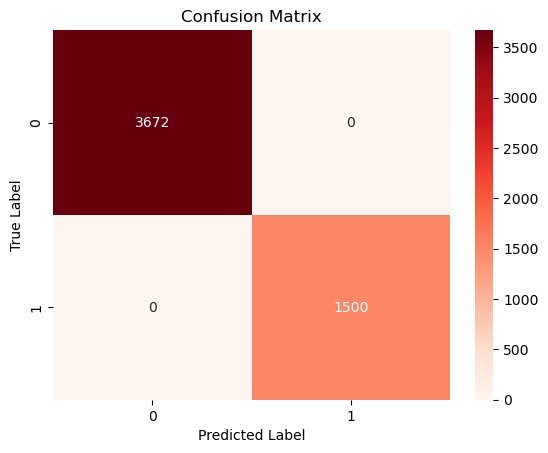

In [92]:
# Select the 5 words for analysis
selected_words = ["e", "t", "a", "o", "i"]

# Extract the selected words and the "Prediction" column
selected_data = df[selected_words + ["Prediction"]]

# Create a mapping for the prediction labels
label_mapping = {0: "Not Spam", 1: "Spam"}

# Replace the numerical labels with their corresponding class names
selected_data["Prediction"] = selected_data["Prediction"].map(label_mapping)

# Calculate the confusion matrix
confusion_mat = confusion_matrix(selected_data["Prediction"], selected_data["Prediction"])

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap="Reds", fmt="d")

# Set the axis labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

## Trying out with SVMs

In [93]:
# Try using Support Vector Classifier (SVC) from scikit-learn
# Apply similar processes as above through SVC i.e., Make prediction, check accuacy and plot confusion matrix

In [94]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix

In [95]:
# Create and train the Support Vector Machine classifier
classifier = SVC()
classifier.fit(X_train, y_train)

SVC()

In [96]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

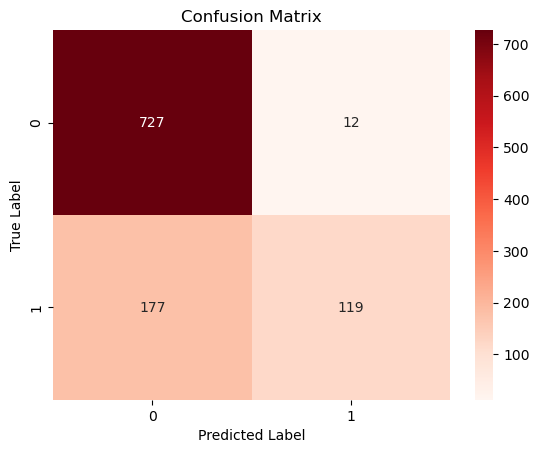

In [97]:
# Calculate the confusion matrix
confusion_mat = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(confusion_mat, annot=True, cmap="Reds", fmt="d")

# Set the axis labels and title
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")

# Show the plot
plt.show()

In [98]:
# Calculate the accuracy of the model on the test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8173913043478261


## Comparing the models

In [99]:
# Which model performed better?
# Can you suggest some reason for better performance of one model over the other?

# The best model for the given problem will be MultinomialGB rather than SVM

## MultinomialNB accuracy = **0.9545893719806763**

## SVM accuracy = **0.8173913043478261**

Here are a few reasons why the MNB classifier might be performing better in your case:


Naive Bayes assumptions: The Multinomial Naive Bayes classifier makes certain assumptions about the independence of the features, assuming that the presence of one particular word does not affect the presence of another word in the email. In text classification tasks, this assumption can hold reasonably well, allowing the MNB classifier to capture the probabilities of different words more effectively.

Handling high-dimensional data: Naive Bayes classifiers, including the Multinomial Naive Bayes classifier, can handle high-dimensional data efficiently. In your case, where you have a large number of word features (3K columns), the MNB classifier may handle the high dimensionality better than the SVM classifier.

Data distribution: The performance of different algorithms can be influenced by the distribution of the data. If the data distribution aligns well with the assumptions of the MNB classifier, it can lead to better accuracy compared to the SVM classifier.

## Bonus Question

In [100]:
# Given a string. Try to create the dataset having each word of dataset as column and row values as the frequency of that word.
# For example 
# s = "I am a Python developer and currently working on a project to classify mails"
# dataframe = {"I" : 1,
#              "am" :1,
#              "a" : 2,
#               ...}

In [101]:
# Given string
s = "I am a Python developer and currently working on a project to classify mails"

# Convert the string to lowercase and split into words
words = s.lower().split()

# Create an empty dictionary to store word frequencies
word_freq = {}

# Count the frequency of each word
for word in words:
    if word in word_freq:
        word_freq[word] += 1
    else:
        word_freq[word] = 1

# Create a DataFrame from the word frequencies
df = pd.DataFrame.from_dict(word_freq, orient='index', columns=['Frequency'])

# Print the DataFrame
print(df)

           Frequency
i                  1
am                 1
a                  2
python             1
developer          1
and                1
currently          1
working            1
on                 1
project            1
to                 1
classify           1
mails              1
